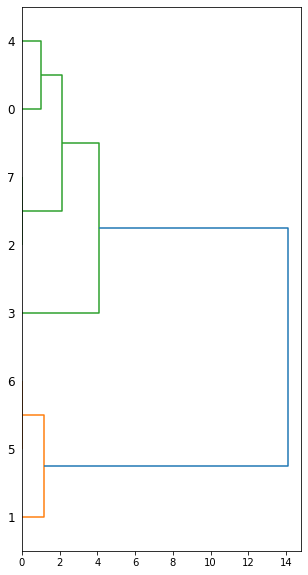

In [74]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 10

from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# chekc the module
X = [[i] for i in [2, 8, 0, 4, 1, 9, 9, 0]]
Z = linkage(X, 'ward')
dn = dendrogram(Z,orientation='right')

In [75]:
# read data
import numpy as np
with open('classes.txt') as file:
    s=file.read()
    names=s.split('\n')
for i in range(len(names)):
    names[i]=names[i][7:].replace("+"," ")
names.pop()
print(names)
    
with open('predicate-matrix-continuous.txt') as file:
    s=file.read()
    lines=s.split('\n')
    data=[]
    for k in range(len(lines)):
        nums=lines[k].split(' ')
        dataline=[]
        for i in range(1,len(nums)):
            try:
                x=float(nums[i])
                can=True
            except:
                can=False
            if can:
                dataline.append(x)
        if len(dataline)==85:
            data.append(dataline)
# print(len(data))

['antelope', 'grizzly bear', 'killer whale', 'beaver', 'dalmatian', 'persian cat', 'horse', 'german shepherd', 'blue whale', 'siamese cat', 'skunk', 'mole', 'tiger', 'hippopotamus', 'leopard', 'moose', 'spider monkey', 'humpback whale', 'elephant', 'gorilla', 'ox', 'fox', 'sheep', 'seal', 'chimpanzee', 'hamster', 'squirrel', 'rhinoceros', 'rabbit', 'bat', 'giraffe', 'wolf', 'chihuahua', 'rat', 'weasel', 'otter', 'buffalo', 'zebra', 'giant panda', 'deer', 'bobcat', 'pig', 'lion', 'mouse', 'polar bear', 'collie', 'walrus', 'raccoon', 'cow', 'dolphin']


[[  8.          17.          93.23886261   2.        ]
 [ 20.          48.         110.86784475   2.        ]
 [ 13.          27.         124.90353838   2.        ]
 [  5.           9.         126.38570449   2.        ]
 [ 14.          40.         129.12976225   2.        ]
 [ 25.          28.         132.71845802   2.        ]
 [  7.          45.         133.45206405   2.        ]
 [ 16.          24.         137.70507325   2.        ]
 [  0.          39.         137.82095378   2.        ]
 [ 41.          51.         138.88495215   3.        ]
 [ 43.          55.         140.90045174   3.        ]
 [  3.          35.         141.8782323    2.        ]
 [ 21.          34.         141.96461214   2.        ]
 [ 18.          52.         143.81295804   3.        ]
 [ 23.          49.         145.45584382   2.        ]
 [ 32.          53.         153.74801668   3.        ]
 [ 33.          47.         154.22537599   2.        ]
 [ 15.          36.         162.39138555   2.        ]
 [ 12.    

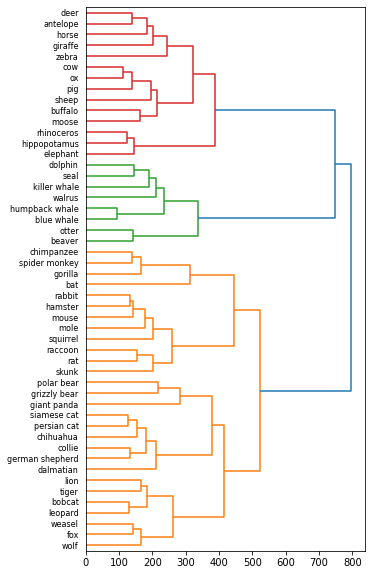

In [81]:
# ward's method
Z = linkage(data, 'ward') # 49*line(pointA, pointB, sqrt(cost), level)
print(Z)
print(Z.shape)
# fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z,orientation='right',labels=names) #
plt.show()

In [140]:
cost=0
for i in range(0,20):
    cost += Z[i][2]**2
print(cost)
401331.6480666667

392798.04949999996


401331.6480666667

In [85]:
import math
def distance(a,b):
    s=0
    for i in range(len(a)):
        s += (a[i]-b[i])**2
    return math.sqrt(s) # square root
print(distance(data[8],data[17]))

93.23886260567532


In [99]:
# k-means++ check
from sklearn.cluster import KMeans
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])
kmeans = KMeans(n_clusters=2).fit(X) #, random_state=0
print(kmeans.labels_)
print(kmeans.predict([[0, 0], [12, 3]]))
print(kmeans.cluster_centers_)
print(kmeans.inertia_)

[1 1 1 0 0 0]
[1 0]
[[10.  2.]
 [ 1.  2.]]
16.0


In [139]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=30).fit(data)
mincost=kmeans.inertia_
for i in range(10):
    kmeans = KMeans(n_clusters=30).fit(data)
    if mincost>kmeans.inertia_:
        mincost=kmeans.inertia_
print("mincost=",mincost*2)

mincost= 401331.6480666667


In [127]:
import math
def distance(a,b):
    s=0
    for i in range(len(a)):
        s += (a[i]-b[i])**2
    return s # square root


collect=[[i] for i in range(50)]
single=[True for i in range(50)]
for i in range(40):
    a=int(Z[i][0])
    b=int(Z[i][1])
    single[a]=False
    single[b]=False
    collect.append(collect[a]+collect[b])
    single.append(True)
cluster=[]
for i in range(len(collect)):
    if single[i]:
        cluster.append(collect[i])
print(cluster)

# compute the cost
cost=0
for clus in cluster:
    s=np.array([0.0 for i in range(85)])
    for i in clus:
        s += np.array(data[i])
    s /= len(clus)
    # print(s)
    # compute cost
    for i in clus:
        cost += distance(s,data[i])
print(cost*2)

[[3, 35], [18, 13, 27], [4, 7, 45, 32, 5, 9], [15, 36, 22, 41, 20, 48], [8, 17, 46, 2, 23, 49], [37, 30, 6, 0, 39], [10, 33, 47, 26, 11, 43, 25, 28], [31, 21, 34, 14, 40, 12, 42], [38, 1, 44], [29, 19, 16, 24]]
1358272.534534524
